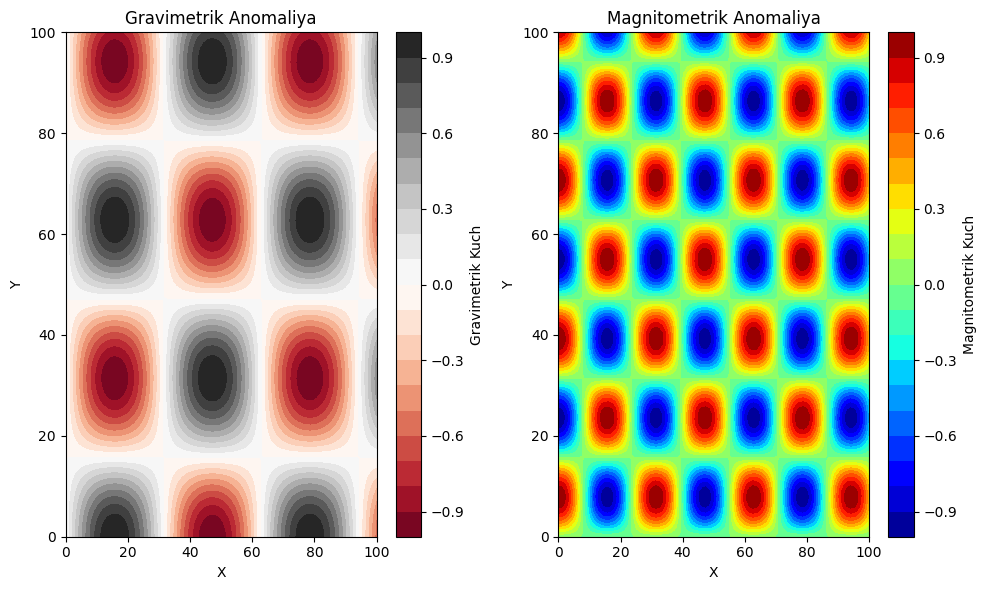

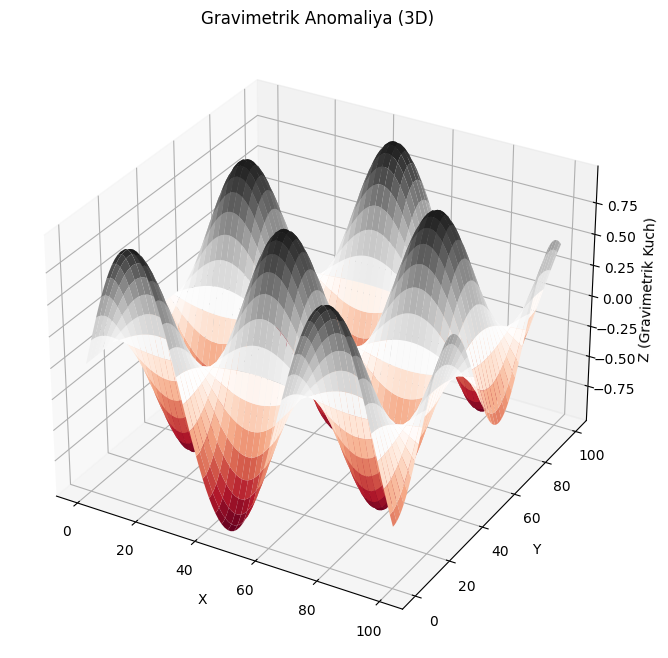

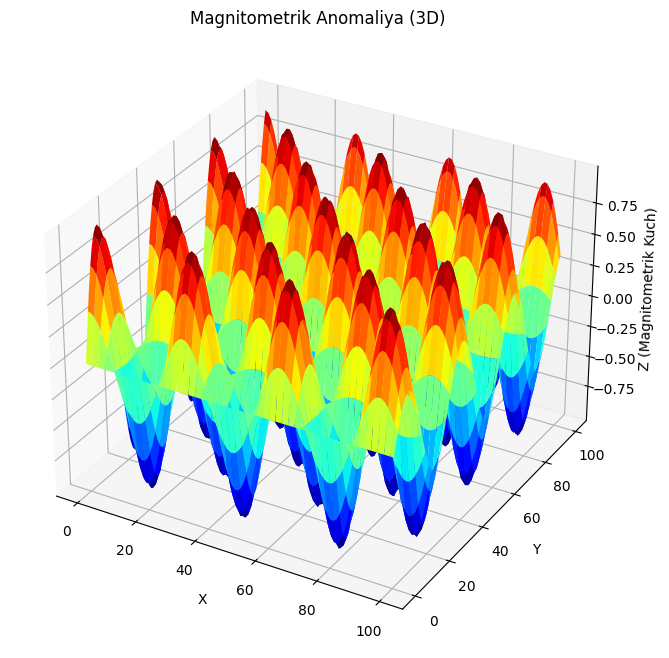

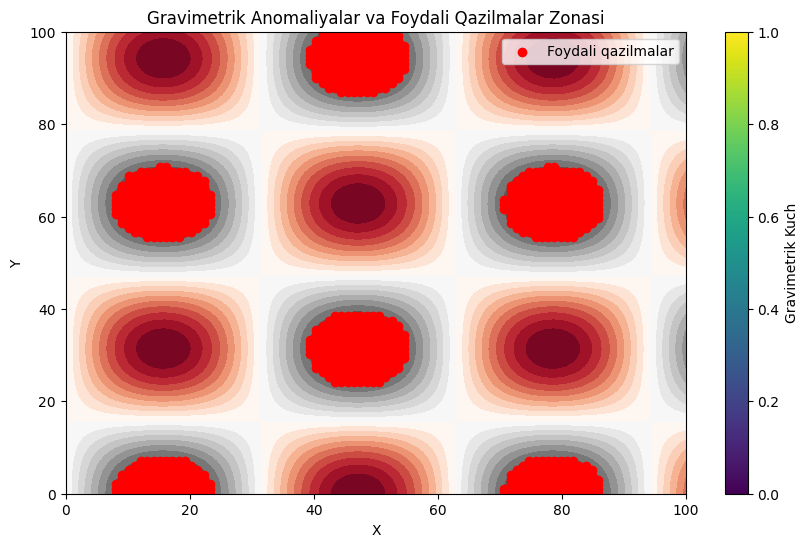

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

import matplotlib.animation as animation

# 1. Sun'iy geofizik ma'lumotlar yaratish (gravimetrik va magnitometrik)
x = np.linspace(0, 100, 100)  # Kon hududi bo'ylab o'q
y = np.linspace(0, 100, 100)
X, Y = np.meshgrid(x, y)

# Gravimetrik va magnitometrik ma'lumotlar (anomaliyalar)
Z_gravity = np.sin(X/10) * np.cos(Y/10)  # Gravimetrik anomaliya
Z_magnet = np.cos(X/5) * np.sin(Y/5)  # Magnitometrik anomaliya

# 2. Geofizik ma'lumotlarni 2D formatda ko'rsatish
plt.figure(figsize=(10, 6))

# Gravimetrik anomaliyani 2D ko'rinishda tasvirlash
plt.subplot(1, 2, 1)
plt.contourf(X, Y, Z_gravity, 20, cmap='RdGy')
plt.title("Gravimetrik Anomaliya")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label='Gravimetrik Kuch')

# Magnitometrik anomaliyani 2D ko'rinishda tasvirlash
plt.subplot(1, 2, 2)
plt.contourf(X, Y, Z_magnet, 20, cmap='jet')
plt.title("Magnitometrik Anomaliya")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(label='Magnitometrik Kuch')

plt.tight_layout()
plt.show()

# 3. Geofizik ma'lumotlarni 3D ko'rinishda tasvirlash
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Gravimetrik anomaliyaning 3D tasviri
ax.plot_surface(X, Y, Z_gravity, cmap='RdGy')
ax.set_title("Gravimetrik Anomaliya (3D)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z (Gravimetrik Kuch)")
plt.show()

# 4. Magnitometrik anomaliyaning 3D tasviri
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z_magnet, cmap='jet')
ax.set_title("Magnitometrik Anomaliya (3D)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z (Magnitometrik Kuch)")
plt.show()

# 5. Aniqlangan anomaliya zonalarini tahlil qilish
# Gravimetrik anomaliya bo'yicha maksimal o'zgarishlarni aniqlaymiz
gravity_threshold = np.percentile(Z_gravity, 90)  # 90% dan yuqori anomaliyalari

# Anomaliyalari yuqori joylarni topamiz
gravity_anomalies = np.where(Z_gravity > gravity_threshold)

# Anomaliyaning joylashuvini ko'rsatish
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z_gravity, 20, cmap='RdGy')
plt.scatter(X[gravity_anomalies], Y[gravity_anomalies], color='r', label="Foydali qazilmalar")
plt.title("Gravimetrik Anomaliyalar va Foydali Qazilmalar Zonasi")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.colorbar(label='Gravimetrik Kuch')
plt.show()

# 6. Magnitometrik anomaliyaning yuqori qiymatlari
magnet_threshold = np.percentile(Z_magnet, 90)  # 90% dan yuqori anomaliyalari

# Anomaliyalari yuqori joylarni topamiz
magnet_anomalies = np.where(Z_magnet > magnet_threshold)

# Anomaliyaning joylashuvini ko'rsatish
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z_magnet, 20, cmap='jet')
plt.scatter(X[magnet_anomalies], Y[magnet_anomalies], color='b', label="Foydali qazilmalar")
plt.title("Magnitometrik Anomaliyalar va Foydali Qazilmalar Zonasi")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.colorbar(label='Magnitometrik Kuch')
plt.show()

# 7. Animatsiya yaratish (Gravimetrik anomaliyaning vaqt o'zgarishi)
fig, ax = plt.subplots(figsize=(10, 6))

# Animatsiya uchun dinamik ma'lumotlar yaratish
